In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
import fun_functions as fun

from yellowbrick.classifier import ConfusionMatrix


# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
air_disaster_2000s = pd.read_csv('../data/Aircraft_Incident_Dataset1.csv')
air_disaster_2000s['Incident_Date'] = pd.to_datetime(air_disaster_2000s['Incident_Date'], format="%m/%d/%Y")
air_disaster_2000s['Year'] = air_disaster_2000s['Incident_Date'].dt.year
air_disaster_2000s = air_disaster_2000s[air_disaster_2000s['Year'] >= 2000]

In [3]:
world_flights = pd.read_csv('../data/API_IS.AIR.DPRT_DS2_en_csv_v2_5735762/API_IS.AIR.DPRT_DS2_en_csv_v2_5735762.csv')
world_flights = world_flights[world_flights['Country Name'] == 'World']
world_flights.fillna(0)
world_flights = world_flights.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code'])
world_flights = world_flights.swapaxes(axis1=0, axis2=1, copy=None).reset_index()
world_flights.rename(columns={'index': 'Year', 259: 'Flights'}, inplace=True)
world_flights.fillna(0, inplace=True)
world_flights = world_flights[world_flights['Flights'] > 0]
df2 = pd.DataFrame({'Year': [1972, 2022], 'Flights': [9634700.00, 32400000]})
world_flights = pd.concat([world_flights, df2],ignore_index=True)
world_flights['Year'] = world_flights['Year'].astype(int)
world_flights = world_flights.sort_values(by='Year', ascending=True).reset_index()

In [4]:
world_flights_2000s = world_flights[world_flights['Year'] >= 2000]

In [34]:
ave_flights = world_flights_2000s['Flights'].mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Total Flights')

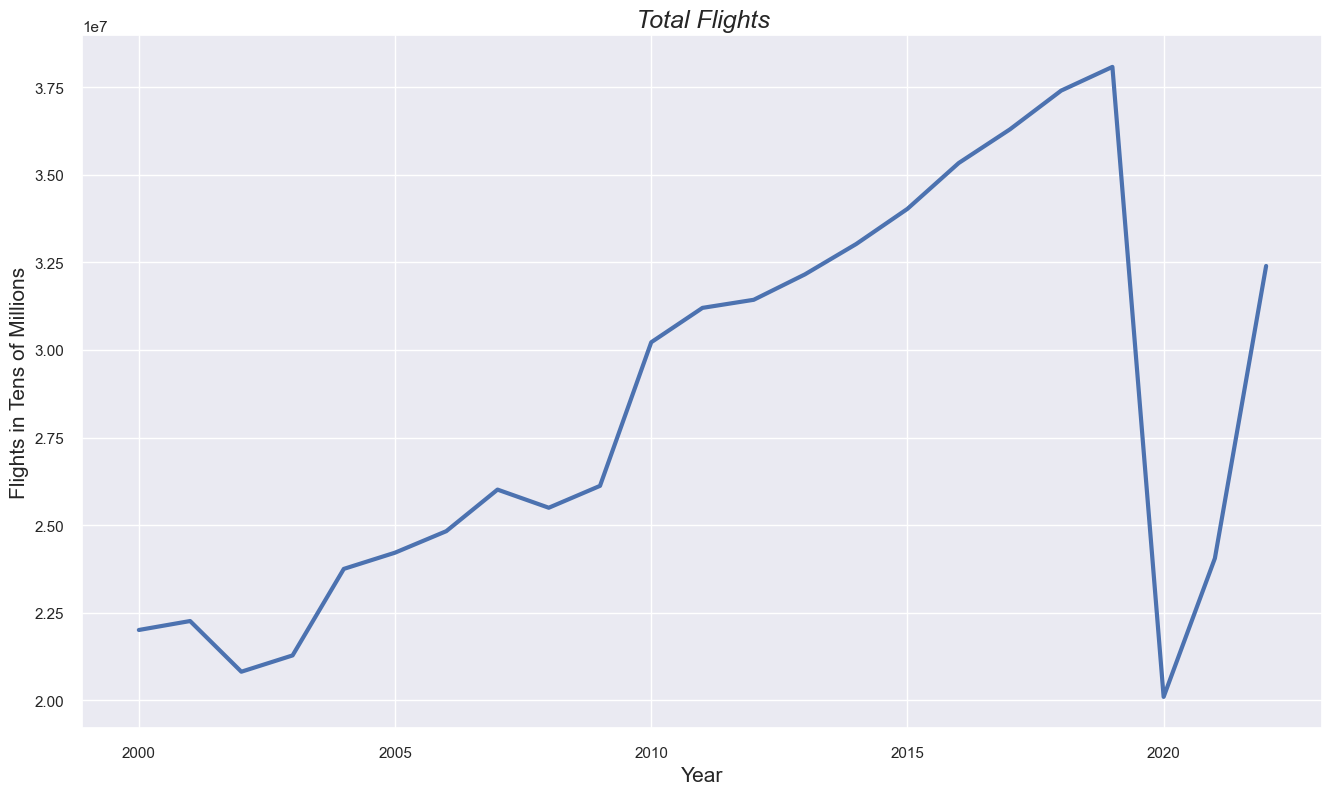

In [46]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(world_flights_2000s, y='Flights', x='Year', linewidth = 3)
#ax.axhline(ave_flights, color = 'r', label=f'Average Flights: {ave_flights:0.0f}', linestyle='--')
ax.legend()
ax.set_ylabel('Flights in Tens of Millions', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_title('Total Flights', style= 'italic', fontsize=18)

In [7]:
air_disaster_2000s['incident_count'] = 1
incidents_by_year_2000s = air_disaster_2000s.groupby('Year')['incident_count'].sum().reset_index()

In [26]:
ave_median_incident = incidents_by_year_2000s['incident_count'].median()

In [38]:
incidents_by_year_2000s

,Year,incident_count,Flights,percent of incidents
0,2000,220,22008658.00,9.996066e-06
1,2001,227,22264220.00,1.019573e-05
2,2002,224,20817389.00,1.076024e-05
3,2003,218,21282617.00,1.024310e-05
4,2004,208,23752616.00,8.756930e-06
5,2005,220,24215712.00,9.085011e-06
6,2006,226,24829383.00,9.102119e-06
7,2007,223,26016011.00,8.571645e-06
8,2008,215,25498093.00,8.432003e-06
9,2009,203,26122523.00,7.771072e-06


Text(0.5, 0, 'Year')

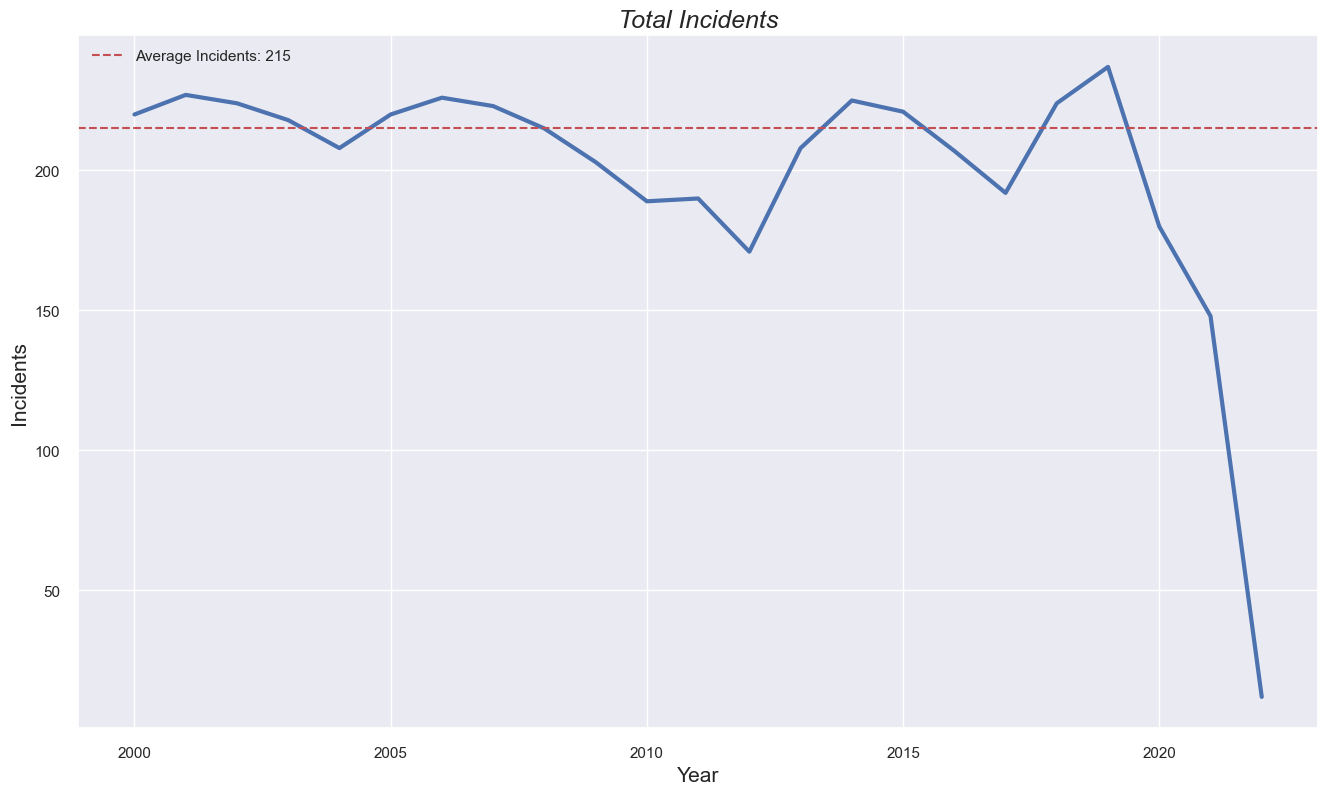

In [51]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(incidents_by_year_2000s, y='incident_count', x='Year', color= 'b', linewidth = 3)
ax.axhline(ave_median_incident, color = 'r', label=f'Average Incidents: {ave_median_incident:0.0f}', linestyle='--')
ax.legend()
ax.set_ylabel('Incidents', fontsize=15)
ax.set_title('Total Incidents', style= 'italic', fontsize=18)
ax.set_xlabel('Year', fontsize=15)


Text(0.5, 1.0, 'Total Incident Counts\n2000-2022')

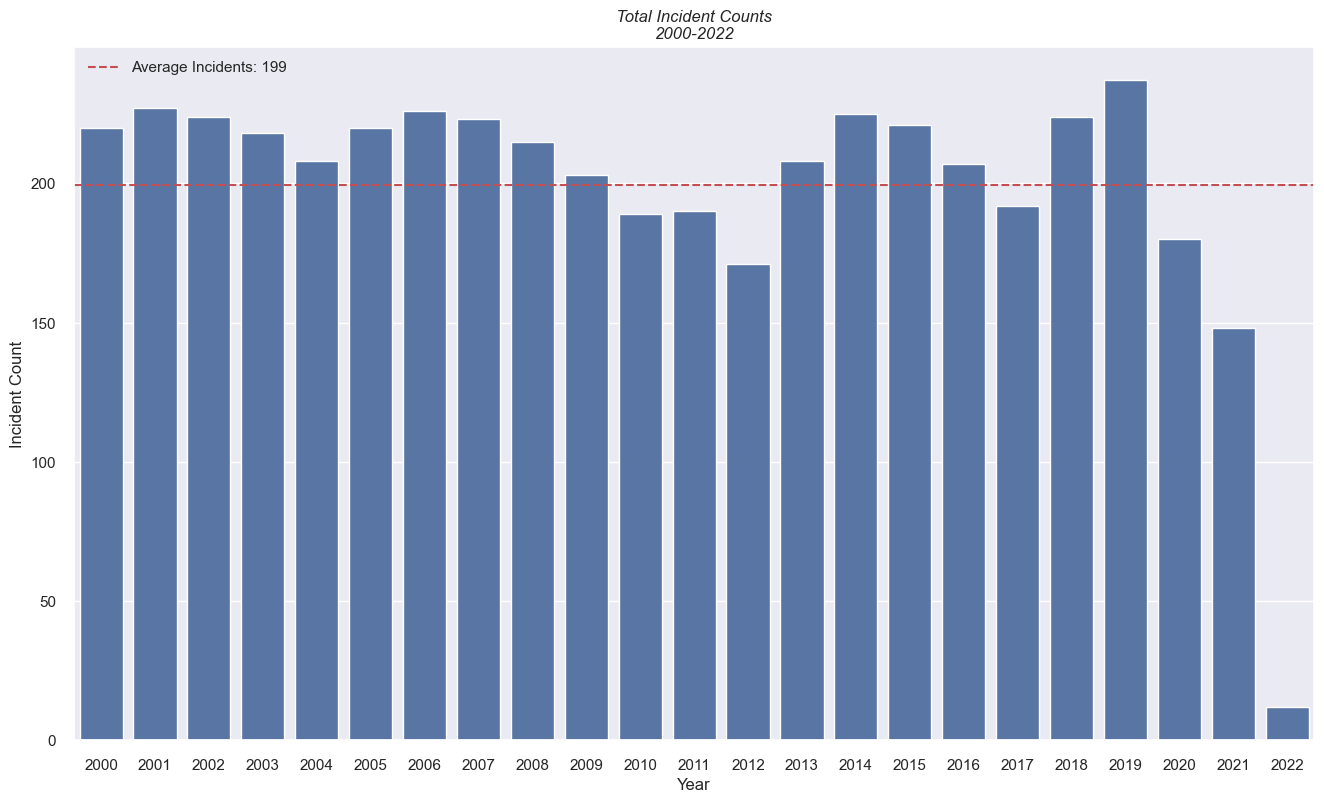

In [11]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.barplot(incidents_by_year_2000s, y='incident_count', x='Year', color= 'b')
ax.axhline(ave_median_incident, color = 'r', label=f'Average Incidents: {ave_median_incident:0.0f}', linestyle='--')
ax.legend()
ax.set_ylabel('Incident Count')
ax.set_title('Total Incident Counts\n2000-2022', style= 'italic')

In [12]:
world_flights_2000s = world_flights_2000s.drop(columns=['index']).reset_index()
incidents_by_year_2000s['Flights'] = world_flights_2000s['Flights']

incidents_by_year_2000s['percent of incidents'] = incidents_by_year_2000s['incident_count']/incidents_by_year_2000s['Flights']

In [13]:
incidents_by_year_2000s = pd.DataFrame(incidents_by_year_2000s)
incidents_by_year_2000s = incidents_by_year_2000s.reset_index()
incidents_by_year_2000s['Flights'] = world_flights_2000s['Flights']
incidents_by_year_2000s = incidents_by_year_2000s.drop(columns='index')
incidents_by_year_2000s['percent of incidents'] = incidents_by_year_2000s['incident_count']/incidents_by_year_2000s['Flights']

Text(0.5, 1.0, 'Incidents as a Percent of Total Flights\n2000-2022')

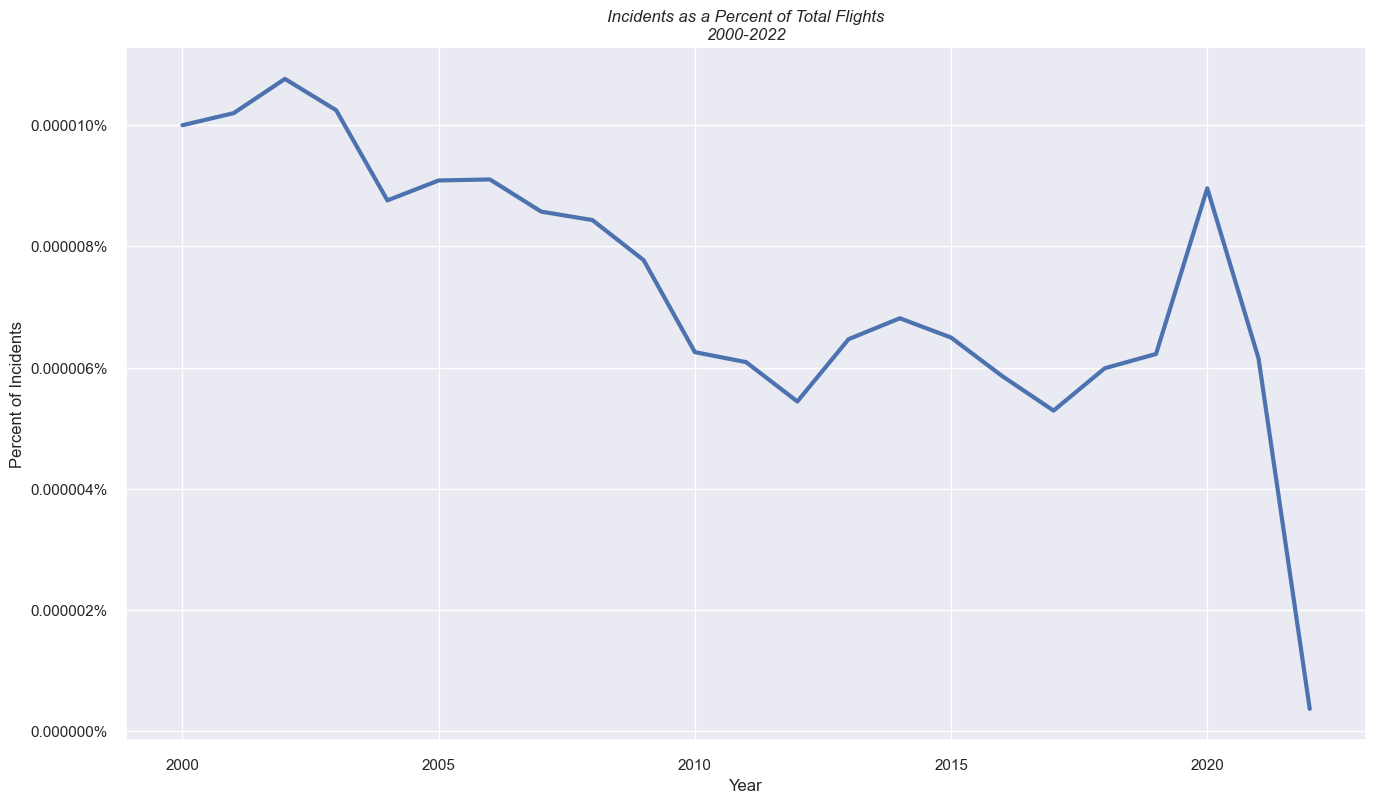

In [15]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(incidents_by_year_2000s, y='percent of incidents', x='Year', linewidth = 3)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%7f'))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=6))
ax.set_ylabel('Percent of Incidents')
ax.set_title('Incidents as a Percent of Total Flights\n2000-2022', style= 'italic')

In [16]:
air_disaster_2000s['Total Occupants'] = fun.occupants(air_disaster_2000s, 'Onboard_Total', 1)
air_disaster_2000s['Total Passengers'] = fun.occupants(air_disaster_2000s, 'Onboard_Passengers', 1)
air_disaster_2000s['Total Crew'] = fun.occupants(air_disaster_2000s, 'Onboard_Crew', 1)
air_disaster_2000s['Total Onboard Fatalities'] = fun.occupants(air_disaster_2000s, 'Onboard_Total', 0)
air_disaster_2000s['Total Passenger Fatalities'] = fun.occupants(air_disaster_2000s, 'Onboard_Passengers', 0)
air_disaster_2000s['Total Crew Fatalities'] = fun.occupants(air_disaster_2000s, 'Onboard_Crew', 0)

Text(0.5, 1.0, 'Total Incidents by Aircraft Phase\n2000-2022')

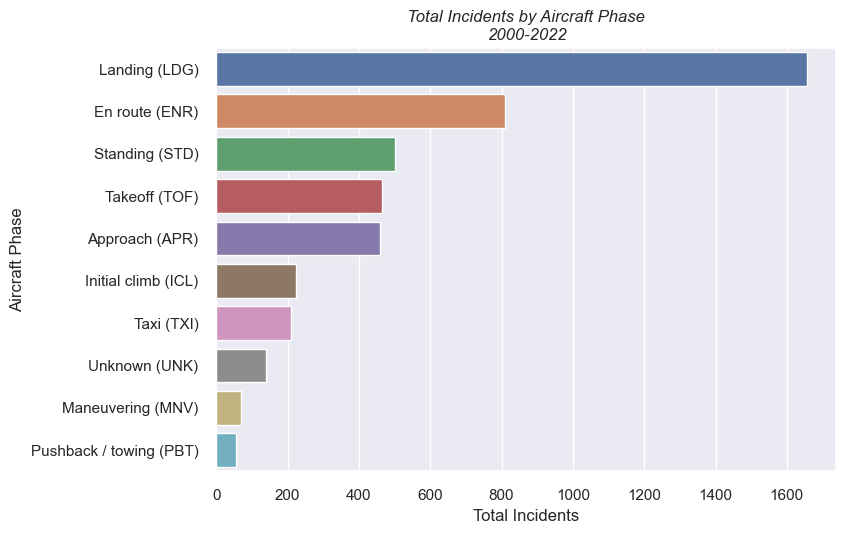

In [18]:
incidents_by_phase_2000s = pd.DataFrame(air_disaster_2000s['Aircraft_Phase'].value_counts()).reset_index()

fig, ax = plt.subplots()
sns.barplot(incidents_by_phase_2000s, y='Aircraft_Phase', x='count')
ax.set_ylabel('Aircraft Phase')
ax.set_xlabel('Total Incidents')
ax.set_title('Total Incidents by Aircraft Phase\n2000-2022', style= 'italic')

<Axes: xlabel='Percent of total', ylabel='Aircraft_Phase'>

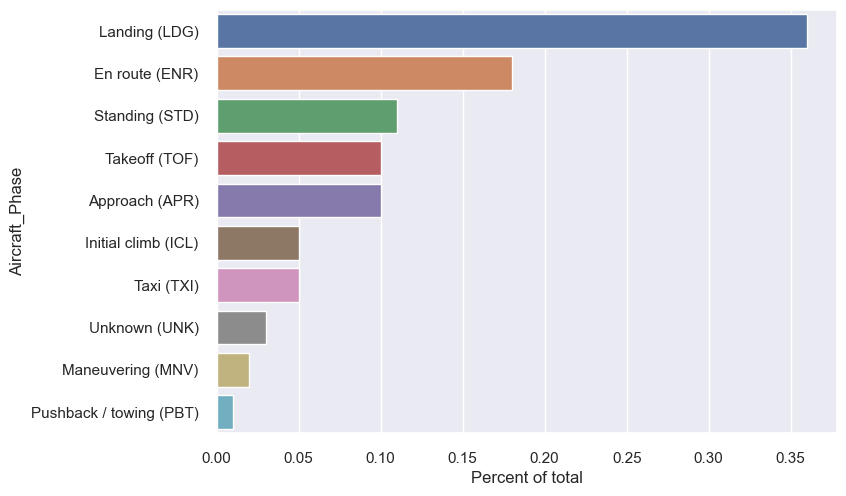

In [19]:
percent =  []

for count in incidents_by_phase_2000s['count']:
    percent.append(f"{(count / (incidents_by_phase_2000s['count'].sum())):.2f}")

incidents_by_phase_2000s['Percent of total'] = percent
incidents_by_phase_2000s['Percent of total'] = incidents_by_phase_2000s['Percent of total'].astype(float)

sns.barplot(incidents_by_phase_2000s, y='Aircraft_Phase', x='Percent of total')

In [53]:
accidents_by_type_2000s = air_disaster_2000s[['Year', 'incident_count', 'Incident_Category', 'Total Onboard Fatalities']]
accidents_by_type_2000s= accidents_by_type_2000s.groupby('Incident_Category').sum().reset_index()
accidents_by_type_2000s= accidents_by_type_2000s.sort_values(by='incident_count', ascending=False)
accidents_by_type_2000s = accidents_by_type_2000s[accidents_by_type_2000s['Total Onboard Fatalities']>100]

<Axes: xlabel='incident_count', ylabel='Incident_Category'>

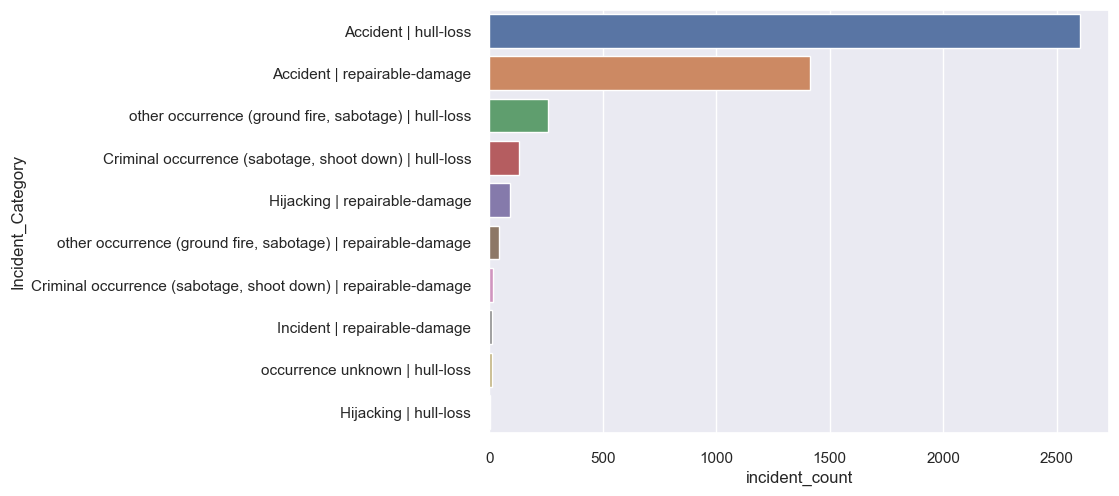

In [21]:
sns.barplot(accidents_by_type_2000s, y='Incident_Category', x='incident_count')

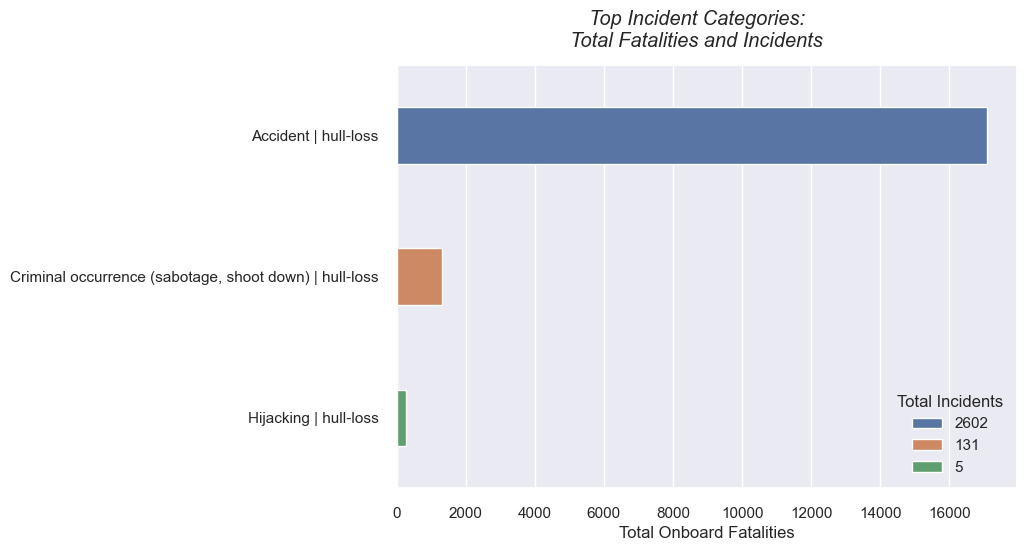

In [75]:
accidents_by_fatalities_2000s = accidents_by_type_2000s.sort_values(by='Total Onboard Fatalities', ascending=False)
fig, ax = plt.subplots()
fig.suptitle('Top Incident Categories:\nTotal Fatalities and Incidents',style= 'italic')
hue_order = [2602, 131, 5]
sns.barplot(accidents_by_fatalities_2000s, y='Incident_Category', x='Total Onboard Fatalities', hue='incident_count', dodge=False, width=.4, hue_order=hue_order, )

ax.set_ylabel('')
plt.legend(title='Total Incidents')




In [23]:
air_disaster_2000s['Total Occupants'] = air_disaster_2000s['Total Occupants'].astype(int)
non_fatal_incidents = air_disaster_2000s[air_disaster_2000s['Total Onboard Fatalities']==0].shape[0]
fatal_incidents = air_disaster_2000s[air_disaster_2000s['Total Onboard Fatalities']!=0].shape[0]

In [24]:
percent_of_incidents_fatal = fatal_incidents / (fatal_incidents+non_fatal_incidents)
percent_of_incidents_non_fatal = non_fatal_incidents / (fatal_incidents+non_fatal_incidents)
print(f'Percent of non-fatal incidents is: {percent_of_incidents_non_fatal:.1%}')
print(f'Percent of fatal incidents is: {percent_of_incidents_fatal:.1%}')

Percent of non-fatal incidents is: 73.6%
Percent of fatal incidents is: 26.4%
